In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from ReliefF import ReliefF
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

from util import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
diabetes_df = read_diabetes_data()
diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
features_df = data_cleaning(diabetes_df)
features_df = label_encoding(features_df)
y = create_target(diabetes_df)

In [4]:
top_features = relief_algorithm(features_df, y)

In [30]:
top_features

Index(['troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone',
       'examide', 'citoglipton', 'miglitol', 'acetohexamide',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'tolazamide',
       'tolbutamide', 'chlorpropamide', 'acarbose', 'nateglinide', 'weight',
       'glyburide-metformin', 'repaglinide', 'max_glu_serum',
       'number_inpatient', 'number_emergency', 'glimepiride', 'rosiglitazone',
       'pioglitazone', 'number_outpatient', 'glipizide', 'glyburide',
       'A1Cresult', 'medical_specialty', 'discharge_disposition_id',
       'metformin', 'race', 'diabetesMed', 'gender', 'diag_3',
       'admission_type_id', 'change', 'diag_2', 'diag_1', 'num_procedures',
       'insulin', 'number_diagnoses', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_medications'],
      dtype='object')

In [7]:
# Model training random forest/all features
X = features_df[top_features[0:36]]
cv_scores = model_training_random_forest(X, y)

In [8]:
cv_scores

{'fit_time': array([5.77178502, 4.63413   , 5.88169718, 4.68130398, 6.0965991 ]),
 'score_time': array([0.22718692, 0.33916211, 0.23673797, 0.26097393, 0.2254529 ]),
 'test_accuracy': array([0.60197923, 0.59717835, 0.60251281, 0.60300414, 0.59893311]),
 'train_accuracy': array([0.96144802, 0.96162417, 0.96201021, 0.96176455, 0.96157153]),
 'test_recall': array([0.54256129, 0.53259214, 0.55025891, 0.54956601, 0.537993  ]),
 'train_recall': array([0.94749867, 0.94620627, 0.94613013, 0.94559507, 0.94612807]),
 'test_f1': array([0.55684926, 0.54928139, 0.5606331 , 0.56066491, 0.55289515]),
 'train_f1': array([0.95772642, 0.95785721, 0.95826023, 0.95797736, 0.95779696])}

Text(0.5, 1.0, 'Random Forest')

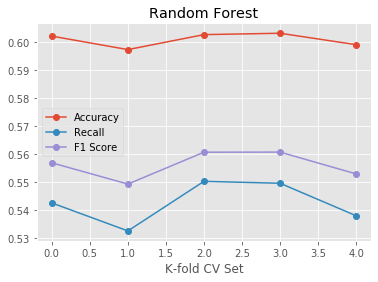

In [24]:
plot_cv_scores(cv_scores)
plt.title("Random Forest/All Features")

In [25]:
# Model training key features
key_features = ['chlorpropamide', 'glimepiride', 'pioglitazone', 'rosiglitazone', 'insulin']
X = features_df[key_features]
cv_scores = model_training_random_forest(X, y)

Text(0.5, 1.0, 'Random Forest/Key Features')

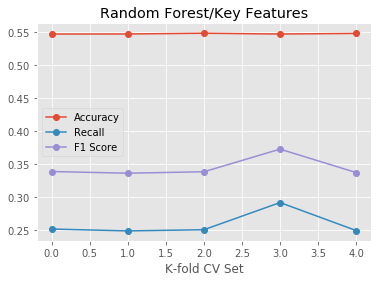

In [26]:
plot_cv_scores(cv_scores)
plt.title("Random Forest/Key Features")

In [28]:
# Model training random forest/all features
#X = features_df[top_features[0:36]]
key_features = ['chlorpropamide', 'glimepiride', 'pioglitazone', 'rosiglitazone', 'insulin']
X = features_df[key_features]
cv_scores = model_training_svm(X, y)

Text(0.5, 1.0, 'SVM/Key Features')

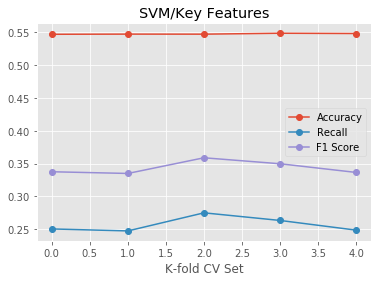

In [29]:
plot_cv_scores(cv_scores)
plt.title("SVM/Key Features")